In [84]:
import pandas as pd
import numpy as np

Lets read all our data into their own dataframes. <br>
Rather than parsing the excel file via the sheets, we can condense our data into a single dataframe/csv

In [83]:
invert_df = pd.read_excel('standard_cell_data_4_cells_V1.xlsx', engine='openpyxl', sheet_name='Inv_1x')
buffer_df = pd.read_excel('standard_cell_data_4_cells_V1.xlsx', engine='openpyxl', sheet_name='buffer_1x')
nand_df = pd.read_excel('standard_cell_data_4_cells_V1.xlsx', engine='openpyxl', sheet_name='nand_1x')
nor_df = pd.read_excel('standard_cell_data_4_cells_V1.xlsx', engine='openpyxl', sheet_name='nor_1x')
invert_df.shape, buffer_df.shape, nand_df.shape, nor_df.shape

((7560, 6), (7560, 6), (7560, 6), (7560, 6))

Need to drop some rows for "FAILED" and negative time values'

In [3]:
buffer_df.drop(buffer_df.index[532:644], axis=0, inplace=True)
buffer_df.shape

(7448, 6)

In [4]:
#standardize column names:
invert_df = invert_df.rename(columns={'clock cycle': 'clock_cycle'})
buffer_df = buffer_df.rename(columns={'clock delay': 'clock_cycle'})
nand_df = nand_df.rename(columns={'Metric': 'Metrics', 'clcok delay': 'clock_cycle'})
nor_df = nor_df.rename(columns={'Metric': 'Metrics', 'clock delay': 'clock_cycle'});

In [5]:
metrics = ['T_RISE ', 'T_FALL ', 'T_DELAY ']
dfs = [invert_df, buffer_df, nand_df, nor_df]

Lets take a look at one:

In [6]:
invert_df.head(4)

,ncfet_inverter,Metrics,clock_cycle,thickness tFE,Vdd,time
0,./100ps/0nm/ncfet_inverter_0.3,.,100ps,0nm,0.3,NaN
1,T_RISE,T_RISE,NaN,NaN,NaN,2.410636e-12
2,T_FALL,T_FALL,NaN,NaN,NaN,2.278608e-12
3,T_DELAY,T_DELAY,NaN,NaN,NaN,4.401267e-12


Looks like every 4 rows represents one single reading -- we can create new columns (for 'T_RISE', etc..) that represent rows 1-3 for the same reading/simulation -- lets see/confirm which metric values might be missing or not what we might be expecting

In [7]:
def check_metrics(df):
    return [(df[df.Metrics == metric].time <= 0).sum() for metric in metrics]

In [222]:
check_metrics(dfs[0]), check_metrics(dfs[1]), check_metrics(dfs[2]), check_metrics(dfs[3])

([0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 571])

Rather than trying to remove all the negative values and their associated rows (the other time values for that condition), lets put all of them into their own columns first and then we can drop the entire rows

In [99]:
dfs[0]

,ncfet_inverter,Metrics,clock cycle,thickness tFE,Vdd,time
0,./100ps/0nm/ncfet_inverter_0.3,.,100ps,0nm,0.3,NaN
1,T_RISE,T_RISE,NaN,NaN,NaN,2.410636e-12
2,T_FALL,T_FALL,NaN,NaN,NaN,2.278608e-12
3,T_DELAY,T_DELAY,NaN,NaN,NaN,4.401267e-12
4,./100ps/0nm/ncfet_inverter_0.4,.,100ps,0nm,0.4,NaN
...,...,...,...,...,...,...
7555,T_DELAY,T_DELAY,NaN,NaN,NaN,3.798987e-12
7556,./900ps/9nm/ncfet_inverter_0.9,.,900ps,9nm,0.9,NaN
7557,T_RISE,T_RISE,NaN,NaN,NaN,2.305576e-11
7558,T_FALL,T_FALL,NaN,NaN,NaN,2.296567e-11


In [103]:
dfs[0].iloc[np.arange(0, len(dfs[0]), 4)]

,ncfet_inverter,Metrics,clock cycle,thickness tFE,Vdd,time
0,./100ps/0nm/ncfet_inverter_0.3,.,100ps,0nm,0.3,NaN
4,./100ps/0nm/ncfet_inverter_0.4,.,100ps,0nm,0.4,NaN
8,./100ps/0nm/ncfet_inverter_0.5,.,100ps,0nm,0.5,NaN
12,./100ps/0nm/ncfet_inverter_0.6,.,100ps,0nm,0.6,NaN
16,./100ps/0nm/ncfet_inverter_0.7,.,100ps,0nm,0.7,NaN
...,...,...,...,...,...,...
7540,./900ps/9nm/ncfet_inverter_0.5,.,900ps,9nm,0.5,NaN
7544,./900ps/9nm/ncfet_inverter_0.6,.,900ps,9nm,0.6,NaN
7548,./900ps/9nm/ncfet_inverter_0.7,.,900ps,9nm,0.7,NaN
7552,./900ps/9nm/ncfet_inverter_0.8,.,900ps,9nm,0.8,NaN


In [8]:
def get_base_df(df):
    base_idxs = np.arange(0, len(df), 4)
    base_df = df.iloc[base_idxs]
    return base_df.reset_index(drop=True)

In [116]:
get_base_df(dfs[0])[:4]

,ncfet_inverter,Metrics,clock cycle,thickness tFE,Vdd,time
0,./100ps/0nm/ncfet_inverter_0.3,.,100ps,0nm,0.3,NaN
1,./100ps/0nm/ncfet_inverter_0.4,.,100ps,0nm,0.4,NaN
2,./100ps/0nm/ncfet_inverter_0.5,.,100ps,0nm,0.5,NaN
3,./100ps/0nm/ncfet_inverter_0.6,.,100ps,0nm,0.6,NaN


In [223]:
metrics

['T_RISE ', 'T_FALL ', 'T_DELAY ']

In [9]:
#| export
def get_metrics_df(df):
    base_df = get_base_df(df)
    for metric in metrics:
        base_df[f'{metric}'] = df[df.Metrics == metric]['time'].map(float).values
    #base_df['type'] = base_df.columns[0]
    base_df.insert(loc=1, column='type', value=base_df.columns[0])
    return base_df

In [208]:
dfs[0][dfs[0].Metrics == 'T_RISE '].time.map(float).values

array([2.410636e-12, 2.254149e-12, 1.891338e-12, ..., 1.634674e-11,
       1.971554e-11, 2.305576e-11])

In [210]:
get_metrics_df(dfs[0]).head(2)

,ncfet_inverter,type,Metrics,clock cycle,thickness tFE,Vdd,time,T_RISE,T_FALL,T_DELAY
0,./100ps/0nm/ncfet_inverter_0.3,ncfet_inverter,.,100ps,0nm,0.3,NaN,2.410636e-12,2.278608e-12,4.401267e-12
1,./100ps/0nm/ncfet_inverter_0.4,ncfet_inverter,.,100ps,0nm,0.4,NaN,2.254149e-12,2.258426e-12,2.525869e-12


In [10]:
def clean_df(df):
    first_col = df.columns[0] #if type was inserted at front would need to index second col
    df = df.drop([first_col, 'Metrics', 'time'], axis=1)
    return df

In [213]:
clean_df(get_metrics_df(dfs[0])).head(4)

,type,clock cycle,thickness tFE,Vdd,T_RISE,T_FALL,T_DELAY
0,ncfet_inverter,100ps,0nm,0.3,2.410636e-12,2.278608e-12,4.401267e-12
1,ncfet_inverter,100ps,0nm,0.4,2.254149e-12,2.258426e-12,2.525869e-12
2,ncfet_inverter,100ps,0nm,0.5,1.891338e-12,1.891455e-12,1.588824e-12
3,ncfet_inverter,100ps,0nm,0.6,1.771861e-12,1.770314e-12,1.168491e-12


In [23]:
final_df = pd.concat([clean_df(get_metrics_df(df)) for df in dfs]).reset_index(drop=True)
final_df.to_csv('final.csv', index=False)
final_df

,type,clock_cycle,thickness tFE,Vdd,T_RISE,T_FALL,T_DELAY
0,ncfet_inverter,100ps,0nm,0.3,2.410636e-12,2.278608e-12,4.401267e-12
1,ncfet_inverter,100ps,0nm,0.4,2.254149e-12,2.258426e-12,2.525869e-12
2,ncfet_inverter,100ps,0nm,0.5,1.891338e-12,1.891455e-12,1.588824e-12
3,ncfet_inverter,100ps,0nm,0.6,1.771861e-12,1.770314e-12,1.168491e-12
4,ncfet_inverter,100ps,0nm,0.7,1.934444e-12,1.938007e-12,9.872374e-13
...,...,...,...,...,...,...,...
7527,ncfet_nor,900ps,9nm,0.5,1.219473e-11,9.754274e-12,-1.304326e-12
7528,ncfet_nor,900ps,9nm,0.6,1.240898e-11,1.007428e-11,-3.400690e-12
7529,ncfet_nor,900ps,9nm,0.7,1.357794e-11,1.163782e-11,-5.207976e-12
7530,ncfet_nor,900ps,9nm,0.8,1.502617e-11,1.367299e-11,-6.807476e-12


In [87]:
new_df = pd.read_csv('final.csv')
new_df.head(3)

,type,clock_cycle,thickness tFE,Vdd,T_RISE,T_FALL,T_DELAY
0,ncfet_inverter,100ps,0nm,0.3,2.410636e-12,2.278608e-12,4.401267e-12
1,ncfet_inverter,100ps,0nm,0.4,2.254149e-12,2.258426e-12,2.525869e-12
2,ncfet_inverter,100ps,0nm,0.5,1.891338e-12,1.891455e-12,1.588824e-12


In [92]:
def get_type_df(df_type, df):
    return df[df.type == df_type]

In [259]:
invert_df = get_type_df('ncfet_inverter', new_df)
buffer_df = get_type_df('ncfet_buffer', new_df)
nand_df = get_type_df('ncfet_nand', new_df)
nor_df = get_type_df('ncfet_nor', new_df)
invert_df.shape, buffer_df.shape, nand_df.shape, nor_df.shape

((1890, 7), (1862, 7), (1890, 7), (1890, 7))

In [249]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_ax(df, y_val, ax):
    xx = df.clock_cycle.map(lambda x: int(x[:-2]))
    yy = df['thickness tFE'].map(lambda x: int(x[:-2]))
    zz = df['Vdd']
    ys = df[f'{y_val}']
    ax.scatter(xx, yy, zz,  marker='o', c=ys , cmap='Reds', s=25)
    ax.set_xlabel('Clock cycle', fontsize=8)
    ax.set_ylabel('$T_{FE}$', fontsize=8, rotation = 0)
    ax.set_zlabel('Vdd', fontsize=8)
    ax.set_title(y_val)

In [275]:
def plot_3_3d(df, name, save=False):
    fig = plt.figure(figsize=plt.figaspect(0.5))

    ax = fig.add_subplot(1, 3, 1, projection='3d')
    plot_ax(invert_df, 'T_RISE ', ax)
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    plot_ax(invert_df, 'T_FALL ', ax)
    ax = fig.add_subplot(1, 3, 3, projection='3d')    
    plot_ax(invert_df, 'T_DELAY ', ax)
    fig.suptitle(name, fontsize=14, y=0.90)
    if save: fig.savefig(f'{name}.png')
    plt.show()

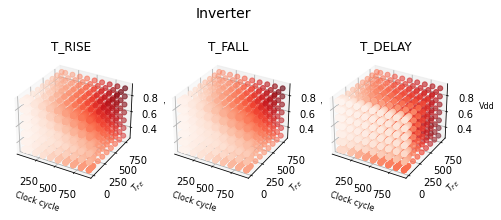

In [271]:
plot_3_3d(invert_df, 'Inverter', save=True)

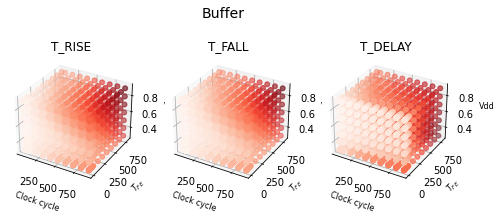

In [272]:
plot_3_3d(buffer_df, 'Buffer', save=True)

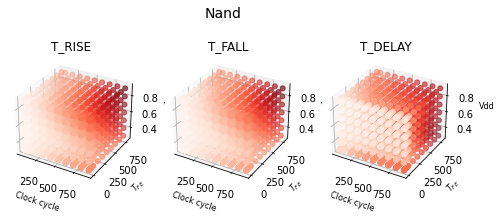

In [273]:
plot_3_3d(nand_df, 'Nand', save=True)

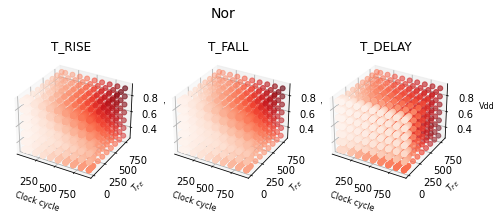

In [355]:
plot_3_3d(nor_df, 'Nor', save=True)

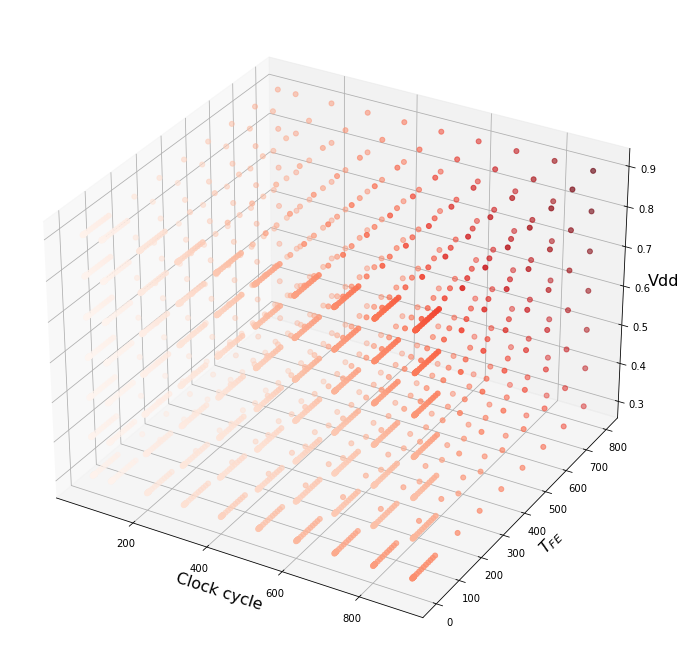

In [261]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
xx = invert_df.clock_cycle.map(lambda x: int(x[:-2]))
yy = invert_df['thickness tFE'].map(lambda x: int(x[:-2]))
zz = invert_df['Vdd']
ax.scatter(xx, yy, zz,  marker='o', c=invert_df['T_RISE '] , cmap='Reds', s=25)
ax.set_xlabel('Clock cycle', fontsize=16)
ax.set_ylabel('$T_{FE}$', fontsize=16, rotation = 0)
ax.set_zlabel('Vdd', fontsize=16)
plt.show()

In [96]:
sample_df = new_df[new_df['type'] == 'ncfet_nor'].reset_index(drop=True)
sample_df.head(3)

,type,clock_cycle,thickness tFE,Vdd,T_RISE,T_FALL,T_DELAY
0,ncfet_nor,100ps,0nm,0.3,4.622999e-12,1.869223e-12,4.254048e-12
1,ncfet_nor,100ps,0nm,0.4,3.148877e-12,1.725079e-12,2.454174e-12
2,ncfet_nor,100ps,0nm,0.5,3.562752e-12,1.458673e-12,1.465977e-12


In [81]:
np.sort(sample_df['thickness tFE'].map(lambda x: int(x[:-2])).value_counts().index)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  20,  30,
        40,  50,  60,  70,  80,  90, 100, 200, 300, 400, 500, 600, 700,
       800])

In [298]:
def scatter_data(df, x_col, y_col, time_col="T_RISE "):
    x = df[x_col]
    y = df[y_col]
    if x_col != 'Vdd': x = x.map(lambda x: int(x[:-2])).values
    else: x = x.values
    if y_col != 'Vdd': y = y.map(lambda x: int(x[:-2])).values
    else: y = y.values
    time_vals = df[time_col]
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(time_col)
    return plt.scatter(x, y, c=time_vals, cmap="Reds" )

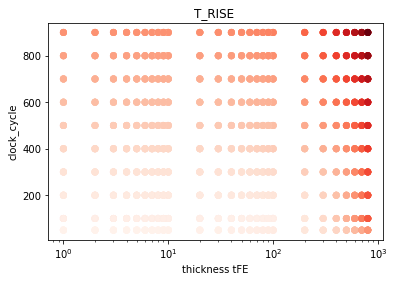

In [299]:
scatter_data(sample_df, 'thickness tFE', 'clock_cycle', 'T_RISE ')
plt.xscale('log')

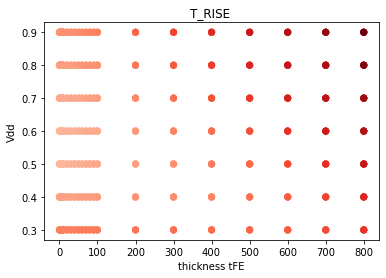

In [301]:
scatter_data(sample_df, 'thickness tFE', 'Vdd', 'T_RISE ');

In [323]:
def scatter_data(x, y, time_vals, 
                x_col, y_col, 
                time_col="T_RISE ", 
                first=False, ax=None):
    ax.scatter(x, y, c=time_vals, cmap="Reds" )
    ax.set_xlabel(x_col)
    if first: ax.set_ylabel(y_col)
    ax.set_title(time_col)

In [337]:
def plot_3_2d(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]
    if x_col != 'Vdd': x = x.map(lambda x: int(x[:-2])).values
    else: x = x.values
    if y_col != 'Vdd': y = y.map(lambda x: int(x[:-2])).values
    else: y = y.values

    fig = plt.figure(figsize=plt.figaspect(0.5))

    time_col = "T_RISE "
    time_vals = df[time_col]
    ax = fig.add_subplot(1, 3, 1)
    scatter_data(x,y, time_vals, x_col, y_col, ax=ax, first=True)

    time_col = "T_FALL "
    time_vals = df[time_col]
    ax = fig.add_subplot(1, 3, 2)
    scatter_data(x,y, time_vals, x_col, y_col,time_col=time_col, ax=ax)

    time_col = "T_DELAY "
    time_vals = df[time_col]
    ax = fig.add_subplot(1, 3, 3)    
    scatter_data(x,y, time_vals, x_col, y_col, ax=ax, time_col=time_col)

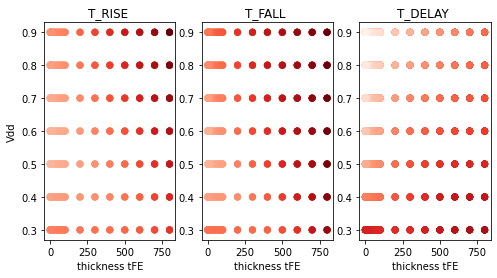

In [339]:
plot_3_2d(nor_df, 'thickness tFE', 'Vdd')

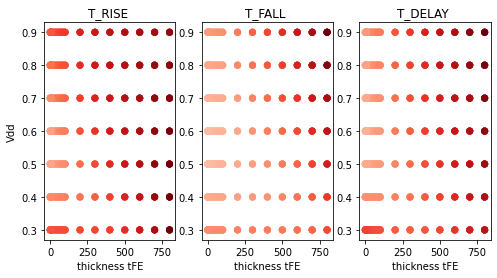

In [340]:
plot_3_2d(nand_df, 'thickness tFE', 'Vdd')

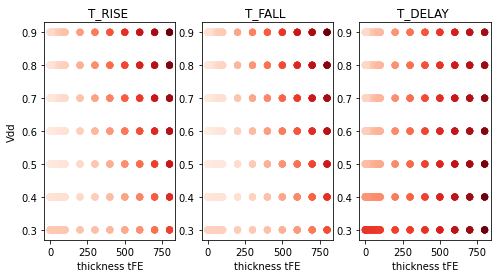

In [341]:
plot_3_2d(buffer_df, 'thickness tFE', 'Vdd')

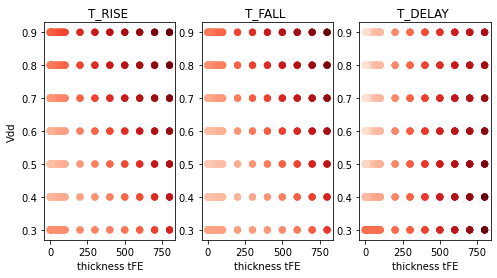

In [343]:
plot_3_2d(invert_df, 'thickness tFE', 'Vdd')

In [347]:
def get_xy(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]
    if x_col != 'Vdd': x = x.map(lambda x: int(x[:-2])).values
    else: x = x.values
    if y_col != 'Vdd': y = y.map(lambda x: int(x[:-2])).values
    else: y = y.values
    return x, y

In [352]:
x, y = get_xy(nand_df, 'clock_cycle', 'Vdd')
time_vals = nand_df['T_RISE ']

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

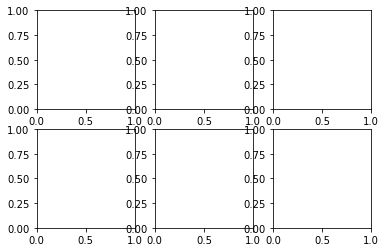

In [354]:
fig, axes = plt.subplots(2, 3)
for ax in axes:
    scatter_data(x, y, time_vals, 'clock_cycle', 'Vdd', ax=ax)

In [ ]:
def scatter_data(x, y, time_vals, 
                x_col, y_col, 
                time_col="T_RISE ", 
                first=False, ax=None):
    ax.scatter(x, y, c=time_vals, cmap="Reds" )
    ax.set_xlabel(x_col)
    if first: ax.set_ylabel(y_col)
    ax.set_title(time_col)